In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv(r"A:\my_codes\my_project\Machine Learning\Unsupervised Machine Learning\K-Means_Clustering\Customer Segmentation using K-Means Clustering\CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
X = df.iloc[:, [1,13]]
X = X.fillna(X.mean())
X = X.values 

In [9]:
wcss = []

In [10]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

In [11]:
for i in range(1,11):
    print(f'Number of clusters: {i} -----> WCSS value: {wcss[i-1]}')

Number of clusters: 1 -----> WCSS value: 157254291166.76187
Number of clusters: 2 -----> WCSS value: 67889060462.55248
Number of clusters: 3 -----> WCSS value: 44605317887.59956
Number of clusters: 4 -----> WCSS value: 37115597307.41723
Number of clusters: 5 -----> WCSS value: 29508098425.959667
Number of clusters: 6 -----> WCSS value: 22695764208.522057
Number of clusters: 7 -----> WCSS value: 19611831224.317245
Number of clusters: 8 -----> WCSS value: 17129720666.972534
Number of clusters: 9 -----> WCSS value: 15592232689.725176
Number of clusters: 10 -----> WCSS value: 12928828258.239553


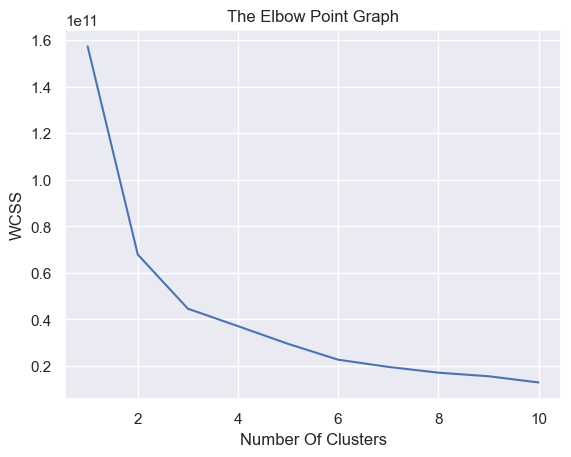

In [12]:
#Plotting the Elbow graph
sns.set()
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4 , init='k-means++' , random_state=0)

In [14]:
Y = kmeans.fit_predict(X)
Y

array([1, 3, 2, ..., 1, 1, 1], shape=(8950,), dtype=int32)

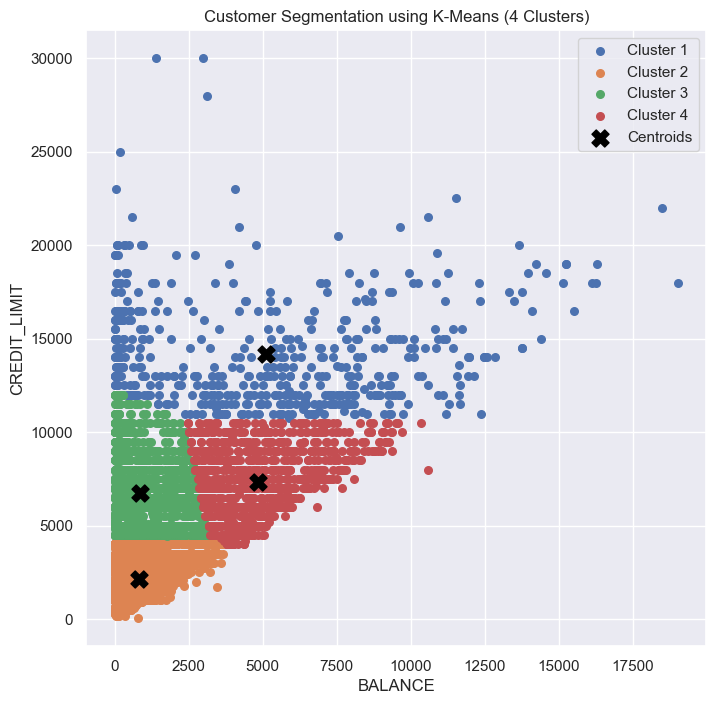

In [15]:
plt.figure(figsize=(8,8))

# Plot clusters
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=30, label='Cluster 1')
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=30, label='Cluster 2')
plt.scatter(X[Y==2, 0], X[Y==2, 1], s=30, label='Cluster 3')
plt.scatter(X[Y==3, 0], X[Y==3, 1], s=30, label='Cluster 4')

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=150,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title('Customer Segmentation using K-Means (4 Clusters)')
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.show()
